In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
from tensorflow import keras

In [52]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Dropout

In [53]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print("x_train:",x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


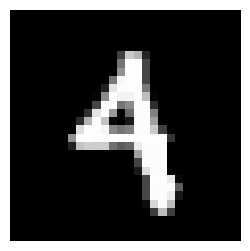

In [54]:
ind = np.random.randint(0, x_train.shape[0])
plt.figure(figsize = (3,3))
plt.imshow(x_train[ind], cmap='gray')
plt.axis('off')
plt.show()

In [55]:
from keras.utils import normalize
X_train = normalize(x_train, axis=1)
X_test = normalize(x_test, axis=1)

In [56]:
from tensorflow.nn import relu,softmax

In [57]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [60]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #Input Layer
model.add(Dense(units=256, activation=relu))   #1st hidden layer
model.add(Dense(units=128, activation=relu))   #2nd hidden layer
model.add(Dense(units=10, activation=softmax))  #Output Layer

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8488 - loss: 0.5557
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9615 - loss: 0.1251
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9769 - loss: 0.0753
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9841 - loss: 0.0514
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9898 - loss: 0.0353
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9917 - loss: 0.0282
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9941 - loss: 0.0197
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9959 - loss: 0.0141
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9971 - loss: 0.0104
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9964 - loss: 0.0110


In [63]:
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:',loss)
print('accuracy:',accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.1136
loss: 0.10187879949808121
accuracy: 0.9751999974250793


In [64]:
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred , average="macro"))
print('Recall:',recall_score(y_test, y_pred , average="macro"))
print('f1-score:',f1_score(y_test, y_pred , average="macro"))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9752
Precision: 0.9752028776840769
Recall: 0.9748076513429226
f1-score: 0.9749204606436738


In [65]:
from keras.utils import to_categorical

# convert to one-hot vector
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [66]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

# resize and normalize
XTrain = np.reshape(x_train, [-1, input_size])
XTrain = XTrain.astype('float32') / 255
XTest = np.reshape(x_test, [-1, input_size])
XTest = XTest.astype('float32') / 255

In [68]:
model2 = Sequential()

model2.add(Dense(1000, input_dim=input_size, activation=relu)) #Input Layer
model2.add(Dense(units=512, activation=relu))   #1st hidden layer
model2.add(Dense(units=256, activation=relu))   #2nd hidden Layer
model2.add(Dense(units=128, activation=relu))   #3rd hidden layer
model2.add(Dense(units=10, activation=softmax))  #Output Layer

model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │         512,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,463,026 (5.58 MB)

 Trainable params: 1,463,026 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='RMSProp',
              metrics=['accuracy'])

In [70]:
model2.fit(XTrain, Y_train, epochs=15, batch_size=200)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8078 - loss: 0.5991
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9656 - loss: 0.1117
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9813 - loss: 0.0600
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9875 - loss: 0.0418
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9904 - loss: 0.0300
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9926 - loss: 0.0237
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9935 - loss: 0.0194
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9962 - loss: 0.0128
Epoch 9/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9960 - loss: 0.0125
Epoch 10/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9969 - loss: 0.0082
Epoch 11/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9973 - loss: 0.0092
Epoch 12/15
300/300 ━━━━━━━━━━━━━━━━━━━━

In [71]:
loss2, accuracy2 = model2.evaluate(XTest, Y_test)
print('loss:',loss2)
print('accuracy:',accuracy2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9807 - loss: 0.1250
loss: 0.09317944198846817
accuracy: 0.9840999841690063


In [72]:
ypred = model2.predict(XTest)
ypred = np.argmax(ypred, axis=1)

# Print f1, precision, and recall scores
print('Accuracy:',accuracy_score(y_test, ypred))
print('Precision:',precision_score(y_test, ypred , average="macro"))
print('Recall:',recall_score(y_test, ypred , average="macro"))
print('f1-score:',f1_score(y_test, ypred , average="macro"))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9841
Precision: 0.9841090868420335
Recall: 0.9839650211601058
f1-score: 0.9840183824175922


Predicted Digit: 9
Actual Digit: 9


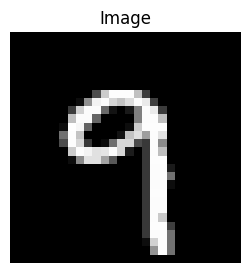

In [73]:
i = np.random.randint(0,X_test.shape[0])

print('Predicted Digit:',y_pred[i])
print("Actual Digit:",y_test[i])

plt.figure(figsize=(3,3))
plt.title('Image')
plt.imshow(x_test[i], cmap='gray')
plt.axis('off')
plt.show()